In [129]:
%load_ext autoreload
%autoreload 2
from keylog_analysis_helper import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


- Notes on keylogger outputs:
- 	range:
	- Represents the span of text affected by the change.
	- Contains start and end positions, each with line and character properties (both zero-based indices).
- rangeOffset:
	- The offset of the change from the beginning of the document (in characters).
- rangeLength:
	- The length of the range that was replaced (in characters).
- text:
	- The new text inserted in place of the range.

__
- Line no's start from 0
- characters end at 200


### 1. Load log files

- Read in log files, fix times, remove some participants 

In [130]:
keylog_data_a3, keylog_data_a4 = get_keylog_dfs()

Getting keylog data for a3 = True

 Log path for  P3  is  /Users/feyzjan/Library/CloudStorage/OneDrive-GeorgiaInstituteofTechnology/GatechCourses/CS 8903 Research/A3_DataFiles/P3/extra_credit.log

 Log path for  P5  is  /Users/feyzjan/Library/CloudStorage/OneDrive-GeorgiaInstituteofTechnology/GatechCourses/CS 8903 Research/A3_DataFiles/P5/extra_credit.log

 Log path for  P8  is  /Users/feyzjan/Library/CloudStorage/OneDrive-GeorgiaInstituteofTechnology/GatechCourses/CS 8903 Research/A3_DataFiles/P8/extra_credit.log

 Log path for  P9  is  /Users/feyzjan/Library/CloudStorage/OneDrive-GeorgiaInstituteofTechnology/GatechCourses/CS 8903 Research/A3_DataFiles/P9/extra_credit.log
Keylog data for P9, length =  565
/Users/feyzjan/Library/CloudStorage/OneDrive-GeorgiaInstituteofTechnology/GatechCourses/CS 8903 Research/A3_DataFiles/P9/extra_credit.log

 Log path for  P11  is  /Users/feyzjan/Library/CloudStorage/OneDrive-GeorgiaInstituteofTechnology/GatechCourses/CS 8903 Research/A3_DataFiles/P11

In [131]:
keylog_data_a3['P9']

,file_name,Time,T_s,start_line,start_character,end_line,end_character,range_offset,range_length,text
0,bustersAgents.py,2024-03-06 03:24:18.203,0.000,13,1,13,1,851,0,s
1,bustersAgents.py,2024-03-06 03:24:18.282,0.079,13,2,13,2,852,0,t
2,bustersAgents.py,2024-03-06 03:24:18.431,0.228,13,3,13,3,853,0,a
3,bustersAgents.py,2024-03-06 03:24:18.513,0.310,13,4,13,4,854,0,r
4,bustersAgents.py,2024-03-06 03:24:18.907,0.704,13,5,13,5,855,0,t
...,...,...,...,...,...,...,...,...,...,...
527,inference.py,2024-03-06 04:33:05.250,4127.047,346,5,346,5,12962,0,s
528,inference.py,2024-03-06 04:33:05.392,4127.189,346,6,346,6,12963,0,h
529,inference.py,2024-03-06 04:33:05.485,4127.282,346,7,346,7,12964,0,e
530,inference.py,2024-03-06 04:33:05.656,4127.453,346,8,346,8,12965,0,d


Check data

In [132]:
pd.set_option('display.max_rows', 100)

In [133]:
df = keylog_data_a3['P9']
df.head(20)

,file_name,Time,T_s,start_line,start_character,end_line,end_character,range_offset,range_length,text
0,bustersAgents.py,2024-03-06 03:24:18.203,0.000,13,1,13,1,851,0,s
1,bustersAgents.py,2024-03-06 03:24:18.282,0.079,13,2,13,2,852,0,t
2,bustersAgents.py,2024-03-06 03:24:18.431,0.228,13,3,13,3,853,0,a
3,bustersAgents.py,2024-03-06 03:24:18.513,0.310,13,4,13,4,854,0,r
4,bustersAgents.py,2024-03-06 03:24:18.907,0.704,13,5,13,5,855,0,t
5,bustersAgents.py,2024-03-06 03:24:18.991,0.788,13,6,13,6,856,0,i
6,bustersAgents.py,2024-03-06 03:24:19.071,0.868,13,7,13,7,857,0,n
7,bustersAgents.py,2024-03-06 03:24:19.147,0.944,13,8,13,8,858,0,g
8,inference.py,2024-03-06 03:25:01.563,43.360,3,11,3,11,57,0,\n
9,inference.py,2024-03-06 03:25:01.792,43.589,4,0,4,0,58,0,\n


In [134]:
df.columns

Index(['file_name', 'Time', 'T_s', 'start_line', 'start_character', 'end_line',
       'end_character', 'range_offset', 'range_length', 'text'],
      dtype='object')

In [135]:
keylog_data_a3.keys(), keylog_data_a4.keys()

(dict_keys(['P3', 'P5', 'P8', 'P9', 'P11', 'P12', 'P13', 'P19', 'P20', 'P21', 'P24', 'P28', 'P29', 'P30', 'P34', 'P42', 'P43', 'P47']),
 dict_keys(['P9', 'P11', 'P15', 'P16', 'P19', 'P20', 'P29', 'P30', 'P34', 'P36', 'P42', 'P43', 'P50', 'P52', 'P53']))

### 1.2. Check start times are okay

In [136]:
# for every df print the largest difference between two consecutive timestamps and the index of this difference
n=100
print(f"Checking max time difference between keystrokes for first {n} keystrokes for each participant")
print("\nA3:")

for p, df in keylog_data_a3.items():
    print_time_info(p,df,n)

print("\nA4:")
for p, df in keylog_data_a4.items():
    print_time_info(p,df,n)

Checking max time difference between keystrokes for first 100 keystrokes for each participant

A3:
P3, total run time 60.2, Max time difference  between keystrokes: 2.8m, at index: 16,  starting: 8, ending:174
P5, total run time 255.5, Max time difference  between keystrokes: 29.7m, at index: 10,  starting: 5, ending:1790
P8, total run time 57.7, Max time difference  between keystrokes: 0.5m, at index: 18,  starting: 10, ending:42
P9, total run time 68.8, Max time difference  between keystrokes: 6.1m, at index: 43,  starting: 145, ending:512
P11, total run time 119.5, Max time difference  between keystrokes: 43.1m, at index: 70,  starting: 2013, ending:4601
P12, total run time 89.0, Max time difference  between keystrokes: 5.1m, at index: 83,  starting: 410, ending:716
P13, total run time 101.0, Max time difference  between keystrokes: 10.8m, at index: 10,  starting: 6, ending:653
P19, total run time 106.0, Max time difference  between keystrokes: 2.4m, at index: 82,  starting: 360, en

Note: Manually determining start times is gonna be problematic, instead add a field ot the dataframe to denote if the student made any activity in that period

Create directories we need

In [137]:
os.makedirs(snapshots_dir_a3, exist_ok=True)
os.makedirs(snapshots_dir_a4, exist_ok=True)

## 2. Loop to create snapshots every n minutes

In [138]:
df = keylog_data_a3['P9']
df

,file_name,Time,T_s,start_line,start_character,end_line,end_character,range_offset,range_length,text
0,bustersAgents.py,2024-03-06 03:24:18.203,0.000,13,1,13,1,851,0,s
1,bustersAgents.py,2024-03-06 03:24:18.282,0.079,13,2,13,2,852,0,t
2,bustersAgents.py,2024-03-06 03:24:18.431,0.228,13,3,13,3,853,0,a
3,bustersAgents.py,2024-03-06 03:24:18.513,0.310,13,4,13,4,854,0,r
4,bustersAgents.py,2024-03-06 03:24:18.907,0.704,13,5,13,5,855,0,t
...,...,...,...,...,...,...,...,...,...,...
527,inference.py,2024-03-06 04:33:05.250,4127.047,346,5,346,5,12962,0,s
528,inference.py,2024-03-06 04:33:05.392,4127.189,346,6,346,6,12963,0,h
529,inference.py,2024-03-06 04:33:05.485,4127.282,346,7,346,7,12964,0,e
530,inference.py,2024-03-06 04:33:05.656,4127.453,346,8,346,8,12965,0,d


Run snapshot creation function

In [139]:
for p, df in keylog_data_a3.items():
    df = create_snapshots(p, df, a3=True)


Creating snapshots for p P3, snapshots start at 2024-03-13 20:35:39.967000, and end at 2024-03-13 21:40:52.846000
Saved initial snapshot: code_snapshots_a3/a3_P3_c0
Processing snapshot 1 for participant P3 at 2024-03-13 20:40:39.967000
Number of changes up to this snapshot time:  76
Saved snapshot: a3_P3_c1
Processing snapshot 2 for participant P3 at 2024-03-13 20:45:39.967000
Number of changes up to this snapshot time:  519
Saved snapshot: a3_P3_c2
Processing snapshot 3 for participant P3 at 2024-03-13 20:50:39.967000
Number of changes up to this snapshot time:  739
Saved snapshot: a3_P3_c3
Processing snapshot 4 for participant P3 at 2024-03-13 20:55:39.967000
Number of changes up to this snapshot time:  865
Saved snapshot: a3_P3_c4
Processing snapshot 5 for participant P3 at 2024-03-13 21:00:39.967000
Number of changes up to this snapshot time:  936
Saved snapshot: a3_P3_c5
Processing snapshot 6 for participant P3 at 2024-03-13 21:05:39.967000
Number of changes up to this snapshot t

In [140]:
for p, df in keylog_data_a4.items():
    df = create_snapshots(p, df, a3=False)


Creating snapshots for p P9, snapshots start at 2024-04-02 21:32:39.091000, and end at 2024-04-02 23:21:59.757000
Saved initial snapshot: code_snapshots_a4/a4_P9_c0
Processing snapshot 1 for participant P9 at 2024-04-02 21:37:39.091000
Number of changes up to this snapshot time:  50
Saved snapshot: a4_P9_c1
Processing snapshot 2 for participant P9 at 2024-04-02 21:42:39.091000
Number of changes up to this snapshot time:  124
Saved snapshot: a4_P9_c2
Processing snapshot 3 for participant P9 at 2024-04-02 21:47:39.091000
Number of changes up to this snapshot time:  124
Saved snapshot: a4_P9_c3
Processing snapshot 4 for participant P9 at 2024-04-02 21:52:39.091000
Number of changes up to this snapshot time:  124
Saved snapshot: a4_P9_c4
Processing snapshot 5 for participant P9 at 2024-04-02 21:57:39.091000
Number of changes up to this snapshot time:  167
Saved snapshot: a4_P9_c5
Processing snapshot 6 for participant P9 at 2024-04-02 22:02:39.091000
Number of changes up to this snapshot t

Verify

In [ ]:
df = keylog_data_a3['P11']
df.snapshot.value_counts().sort_index()

snapshot
1       9
5       4
7      57
16      8
17     48
19    120
20    131
23    157
24    263
Name: count, dtype: int64

In [157]:
df.head(20)

,file_name,Time,T_s,start_line,start_character,end_line,end_character,range_offset,range_length,text,snapshot
0,inference.py,2024-03-13 01:22:30.300,0.000,16,0,16,0,401,0,S,1
1,inference.py,2024-03-13 01:22:30.498,0.198,16,1,16,1,402,0,t,1
2,inference.py,2024-03-13 01:22:30.656,0.356,16,2,16,2,403,0,a,1
3,inference.py,2024-03-13 01:22:31.321,1.021,16,3,16,3,404,0,r,1
4,inference.py,2024-03-13 01:22:31.551,1.251,16,4,16,4,405,0,t,1
5,inference.py,2024-03-13 01:22:31.889,1.589,16,5,16,5,406,0,i,1
6,inference.py,2024-03-13 01:22:32.132,1.832,16,6,16,6,407,0,n,1
7,inference.py,2024-03-13 01:22:32.603,2.303,16,7,16,7,408,0,g,1
8,inference.py,2024-03-13 01:22:38.235,7.935,16,0,16,8,401,8,,1
9,inference.py,2024-03-13 01:42:48.070,1217.770,71,0,71,0,1917,0,d,5


In [163]:
p = 'P11' 
test_p5_path =  code_file_path_inference = f"/Users/feyzjan/Library/CloudStorage/OneDrive-GeorgiaInstituteofTechnology/GatechCourses/CS 8903 Research/A3_DataFiles/{p}/Session_Start_{p}/tracking/inference.py"    
test_p5_content = read_file_as_string(test_p5_path)

df = df[df.snapshot < 5]
for i, row in df.iterrows():
    test_p5_content = apply_change(test_p5_content, row)
    
print(test_p5_content)

import itertools
import random
import busters
import game

from util import manhattanDistance, raiseNotDefined
import util

class DiscreteDistribution(dict):
    """
    A DiscreteDistribution models belief distributions and weight distributions
    over a finite set of discrete keys.
    """
    def __getitem__(self, key):
        self.setdefault(key, 0)
        return dict.__getitem__(self, key)

    def copy(self):
        """
        Return a copy of the distribution.
        """
        return DiscreteDistribution(dict.copy(self))

    def argMax(self):
        """
        Return the key with the highest value.
        """
        if len(self.keys()) == 0:
            return None
        all = list(self.items())
        values = [x[1] for x in all]
        maxIndex = values.index(max(values))
        return all[maxIndex][0]

    def total(self):
        """
        Return the sum of values for all keys.
        """
        return float(sum(self.values()))

    def normalize(self):

In [169]:
test_p5_content[10476:10476+25]

'tDefined()\n\n    def elaps'

In [168]:
test_p5_content[10470:10476] + test_p5_content[10476+25: 10510]

'aiseNoeTime(sel'

##  3. Copy over files from a3_files_to_copy/a4_files_to_copy to each snapshot folder so we can run the autograders

In [170]:
move_assignment_files(a3=True)
move_assignment_files(a3=False)

Processing 'code_snapshots_a3/a3_P5_c18'...
Processing 'code_snapshots_a3/a3_P47_c5'...
Processing 'code_snapshots_a3/a3_P28_c13'...
Processing 'code_snapshots_a3/a3_P5_c27'...
Processing 'code_snapshots_a3/a3_P43_c21'...
Processing 'code_snapshots_a3/a3_P28_c14'...
Processing 'code_snapshots_a3/a3_P47_c2'...
Processing 'code_snapshots_a3/a3_P43_c19'...
Processing 'code_snapshots_a3/a3_P5_c20'...
Processing 'code_snapshots_a3/a3_P43_c4'...
Processing 'code_snapshots_a3/a3_P12_c4'...
Processing 'code_snapshots_a3/a3_P5_c29'...
Processing 'code_snapshots_a3/a3_P5_c16'...
Processing 'code_snapshots_a3/a3_P43_c10'...
Processing 'code_snapshots_a3/a3_P12_c3'...
Processing 'code_snapshots_a3/a3_P43_c3'...
Processing 'code_snapshots_a3/a3_P43_c17'...
Processing 'code_snapshots_a3/a3_P5_c11'...
Processing 'code_snapshots_a3/a3_P5_c45'...
Processing 'code_snapshots_a3/a3_P42_c17'...
Processing 'code_snapshots_a3/a3_P3_c5'...
Processing 'code_snapshots_a3/a3_P42_c10'...
Processing 'code_snapshot

KeyboardInterrupt: 

# 4. Run the autograder
- TODO: 
    -  Install pypy for faster execution of a4 if needed



In [145]:
check_syntax("/Users/feyzjan/GithubRepos/EDA_Productivity/code_snapshots_a3/a3_P5_c6/tracking/bustersAgents.py")

1

In [149]:
df_a3 = run_local_autograder(a3=True,start_idx = 2, end_idx = 3)


 ---- Processing participant P11, snapshot 10..., assignment a3
Checking syntax for bustersAgents.py
Checking syntax for inference.py
Syntax error in code_snapshots_a3/a3_P11_c10/tracking/inference.py:
  File "code_snapshots_a3/a3_P11_c10/tracking/inference.py", line 304
    raiseNeTime(self, gameState):
                                ^
SyntaxError: invalid syntax


Running autograder for question q1

Running autograder for question q2

Running autograder for question q3

Running autograder for question q4

Running autograder for question q5

Running autograder for question q6

Running autograder for question q7
Score match not found For q2 the student earned 0? points.
Score match not found For q1 the student earned 0? points.
Score match not found For q3 the student earned 0? points.
Score match not found For q5 the student earned 0? points.
Score match not found For q6 the student earned 0? points.
Score match not found For q4 the student earned 0? points.
Score match not found Fo

In [9]:
keylog_data_a3

NameError: name 'keylog_data_a3' is not defined

In [10]:
df_a4 = run_local_autograder(a3=False, test_first_n=-1)

Processing participant P0, snapshot 0..., assignment a4

Running autograder for question q1

Running autograder for question q2

Running autograder for question q3

Running autograder for question q4
For q1 error running autograder in code_snapshots_a4/a4_P0_c0: expected string or bytes-like object, got 'CompletedProcess'
For q2 error running autograder in code_snapshots_a4/a4_P0_c0: expected string or bytes-like object, got 'CompletedProcess'
For q3 error running autograder in code_snapshots_a4/a4_P0_c0: expected string or bytes-like object, got 'CompletedProcess'
For q4 error running autograder in code_snapshots_a4/a4_P0_c0: expected string or bytes-like object, got 'CompletedProcess'
Processing participant P11, snapshot 0..., assignment a4

Running autograder for question q1

Running autograder for question q2

Running autograder for question q3

Running autograder for question q4
For q2 error running autograder in code_snapshots_a4/a4_P11_c0: expected string or bytes-like object, g

In [11]:
df_a3.head(10)

,participant,snapshot,bustersAgents.py_length,inference.py_length,q1_points,q2_points,q3_points,q4_points,q7_points,q6_points,q5_points
0,P0,0,7336,22506,0,0,0,0,0,0,0
1,P11,0,21794,19913,0,0,0,0,0,0,0
2,P11,1,21794,19914,0,0,0,0,0,0,0
3,P11,2,21794,19913,0,0,0,0,0,0,0
4,P11,3,21794,19913,0,0,0,0,0,0,0
5,P11,4,21794,19913,0,0,0,0,0,0,0
6,P11,5,21794,19913,0,0,0,0,0,0,0
7,P11,6,21794,19887,0,0,0,0,0,0,0
8,P11,7,21794,19887,0,0,0,0,0,0,0
9,P11,8,21794,20198,0,0,0,0,0,0,0


In [12]:
df_a4.head(10)

,participant,snapshot,NeuralNet.py_length,NeuralNetUtil.py_length,q1_points,q2_points,q3_points,q4_points
0,P0,0,13284,5432,0,0,0,0
1,P11,0,12685,5474,0,0,0,0
2,P11,1,12686,5474,0,0,0,0
3,P11,2,12685,5474,0,0,0,0
4,P11,3,12685,5474,0,0,0,0
5,P11,4,12685,5474,0,0,0,0
6,P11,5,12685,5474,0,0,0,0
7,P11,6,12724,5474,0,0,0,0
8,P11,7,12835,5474,0,0,0,0
9,P11,8,12919,5474,0,0,0,0


In [4]:
df_a3.to_csv(f"KeylogDatasets/a3.csv")
df_a4.to_csv(f"KeylogDatasets/a4.csv")

### Create Plots

bustersAgents.py_length inference.py_length


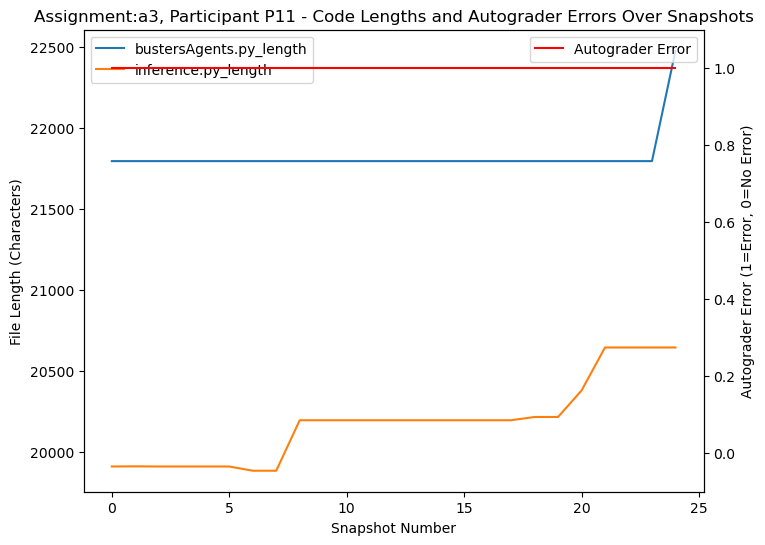

bustersAgents.py_length inference.py_length


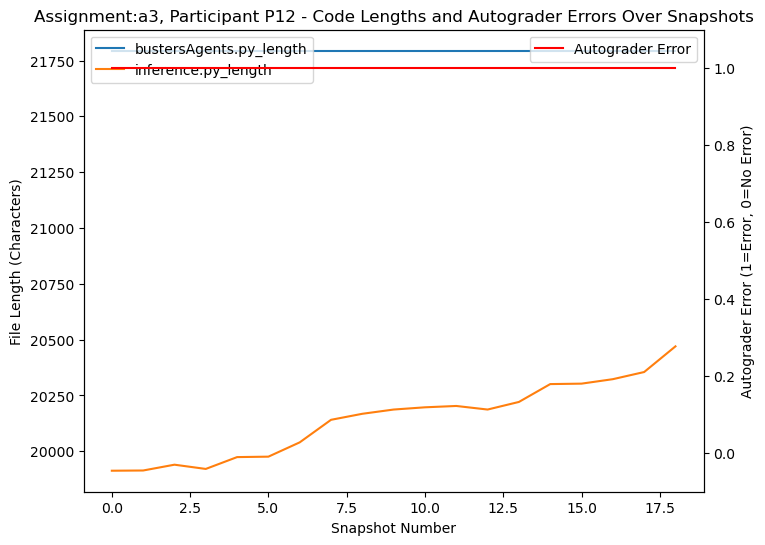

bustersAgents.py_length inference.py_length


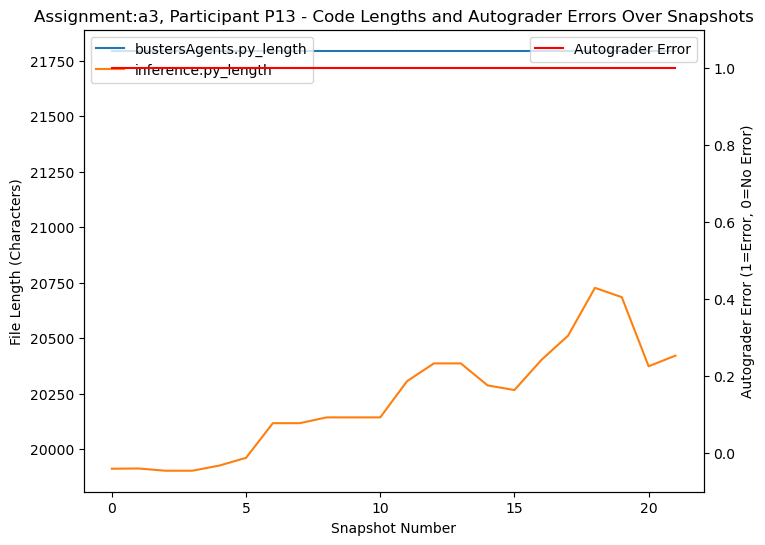

bustersAgents.py_length inference.py_length


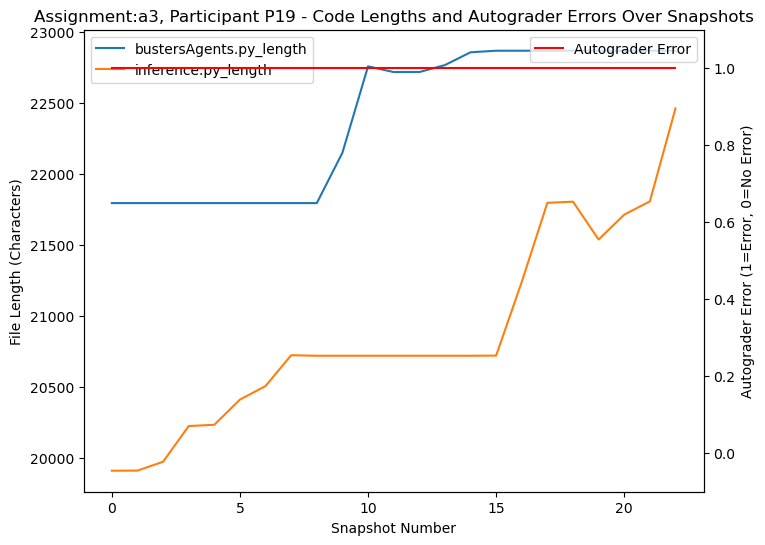

bustersAgents.py_length inference.py_length


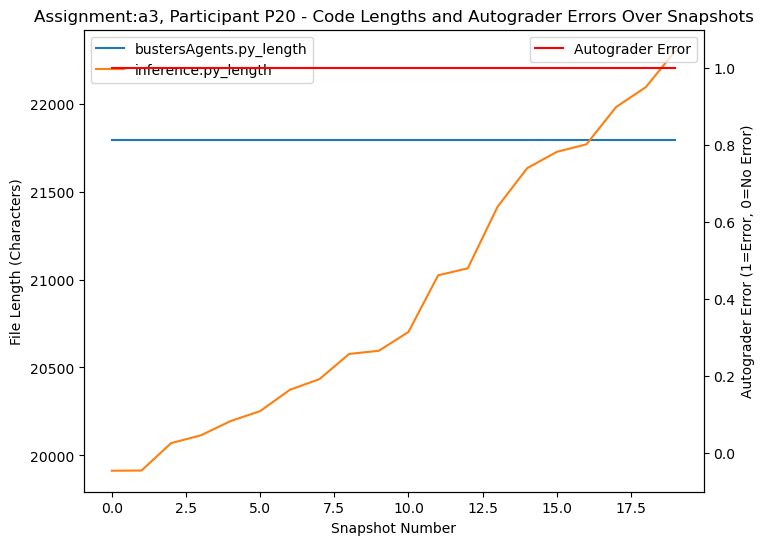

bustersAgents.py_length inference.py_length


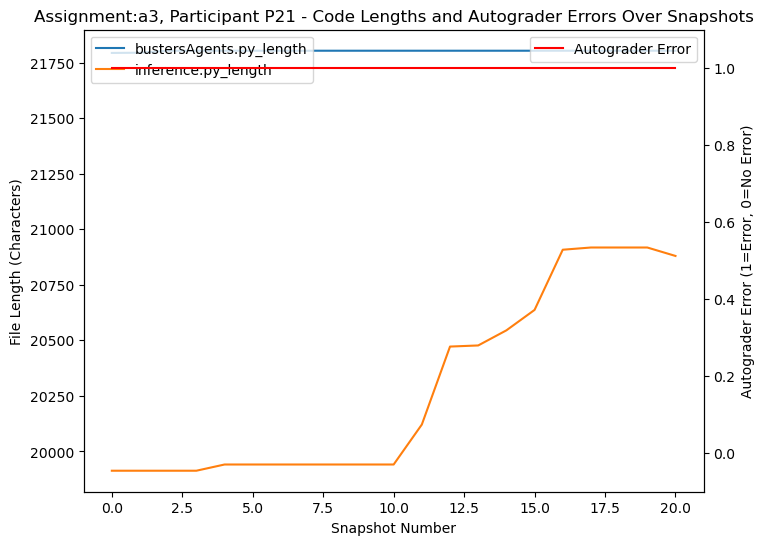

bustersAgents.py_length inference.py_length


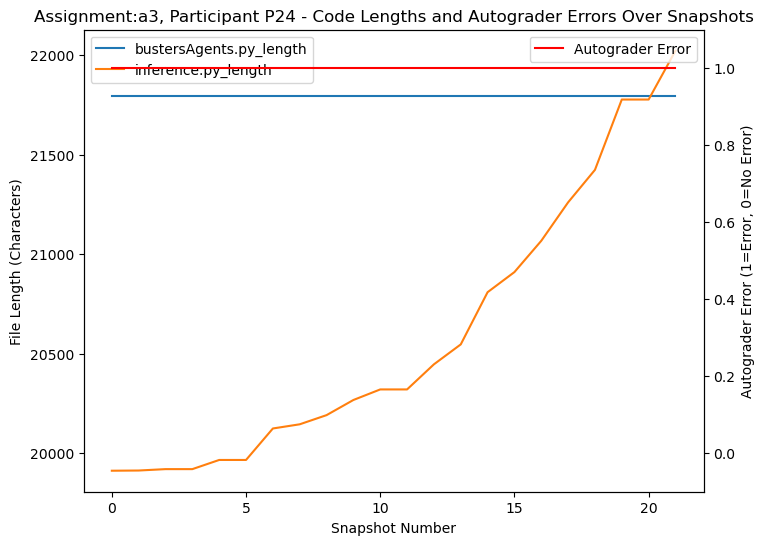

bustersAgents.py_length inference.py_length


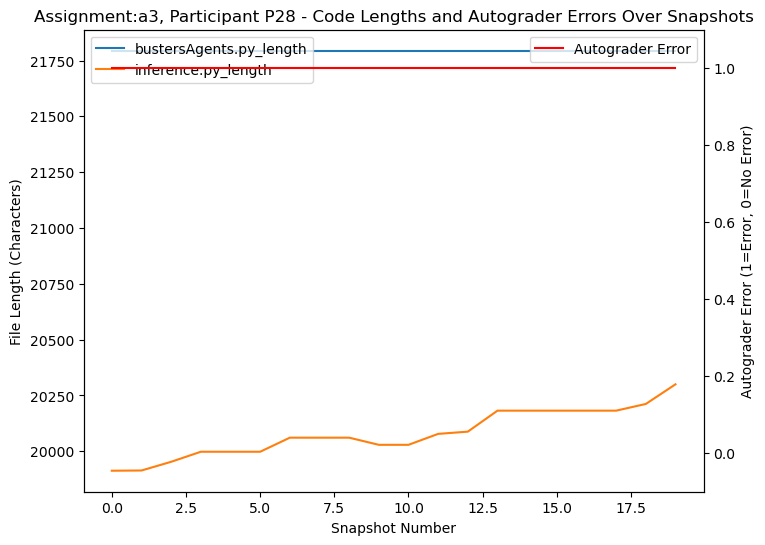

bustersAgents.py_length inference.py_length


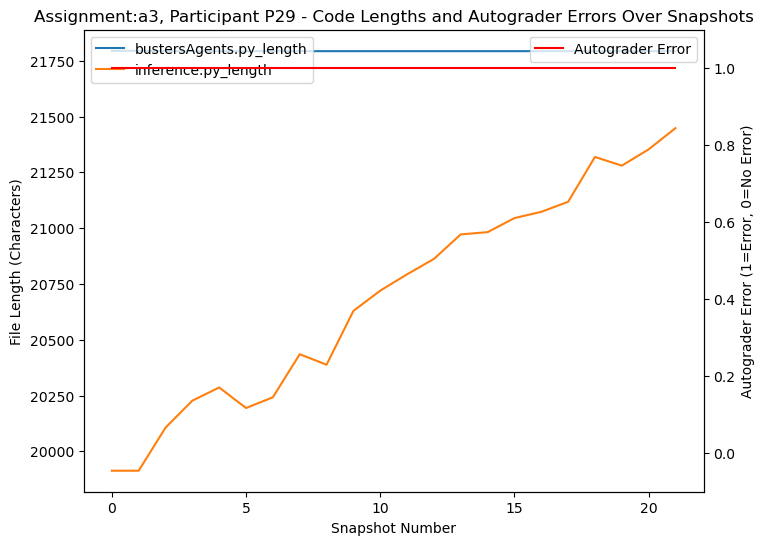

bustersAgents.py_length inference.py_length


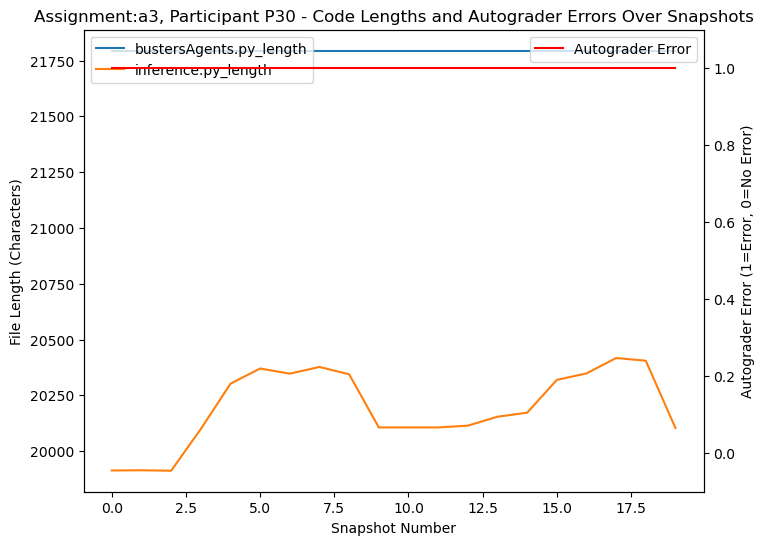

bustersAgents.py_length inference.py_length


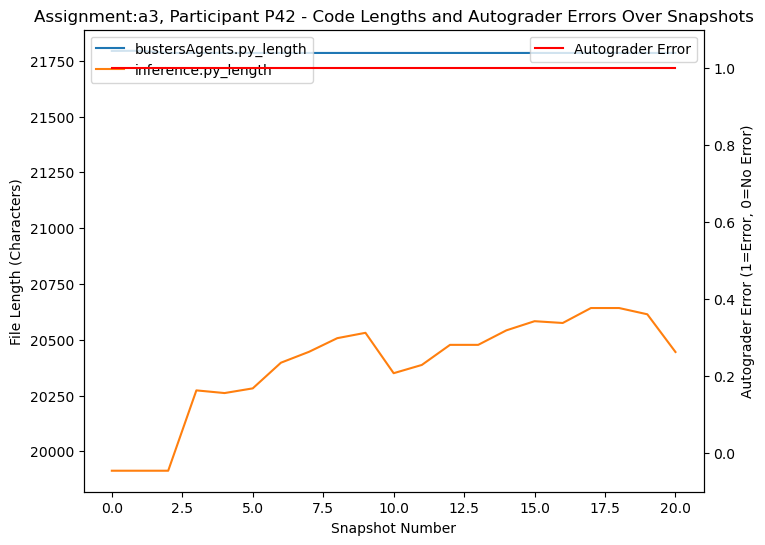

bustersAgents.py_length inference.py_length


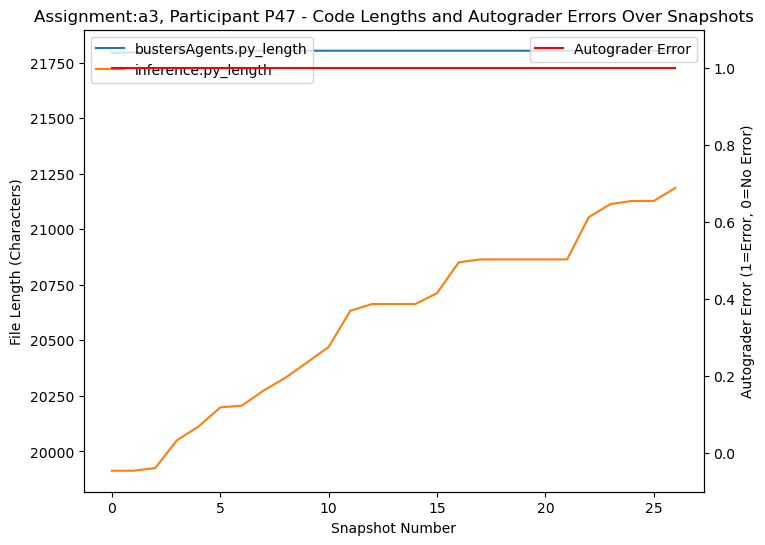

bustersAgents.py_length inference.py_length


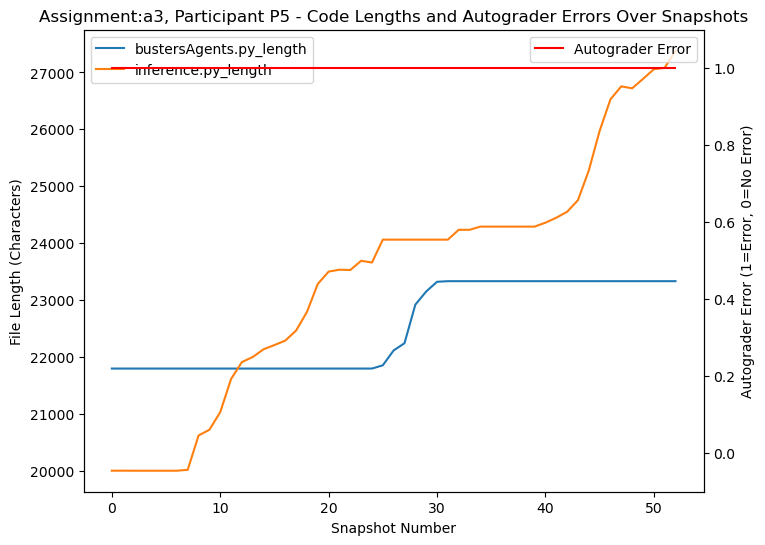

In [34]:
plot_keylogger_results(df_a3)

NeuralNet.py_length NeuralNetUtil.py_length


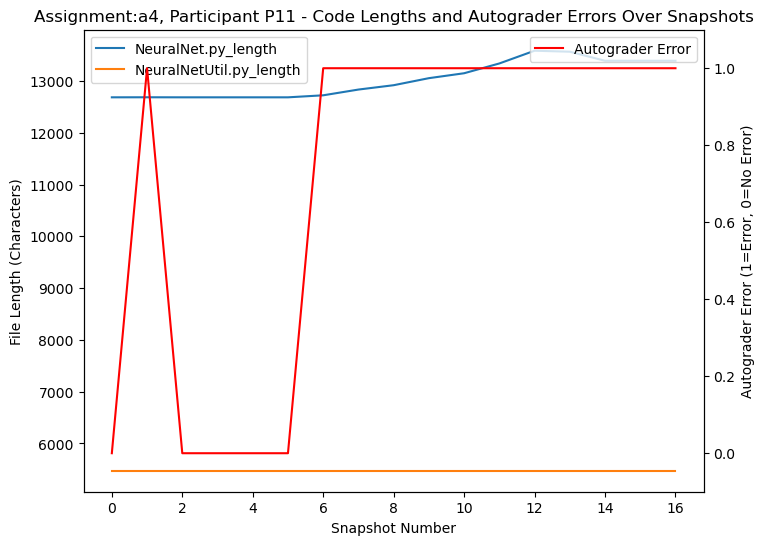

NeuralNet.py_length NeuralNetUtil.py_length


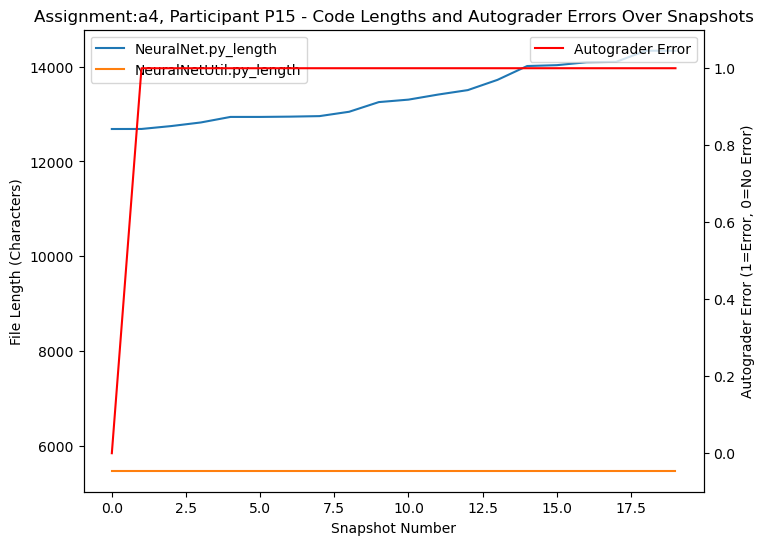

NeuralNet.py_length NeuralNetUtil.py_length


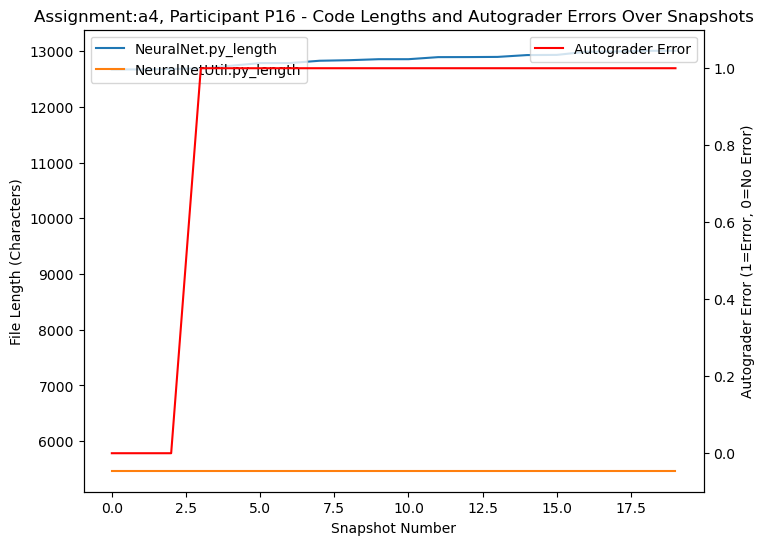

NeuralNet.py_length NeuralNetUtil.py_length


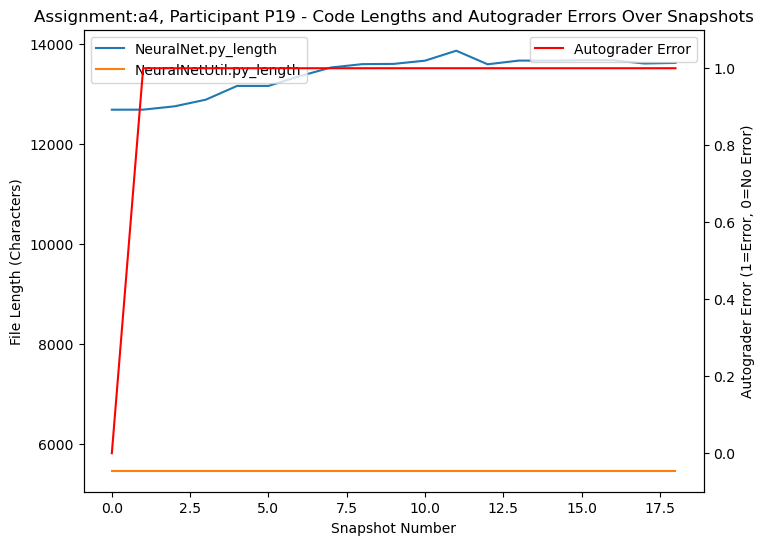

NeuralNet.py_length NeuralNetUtil.py_length


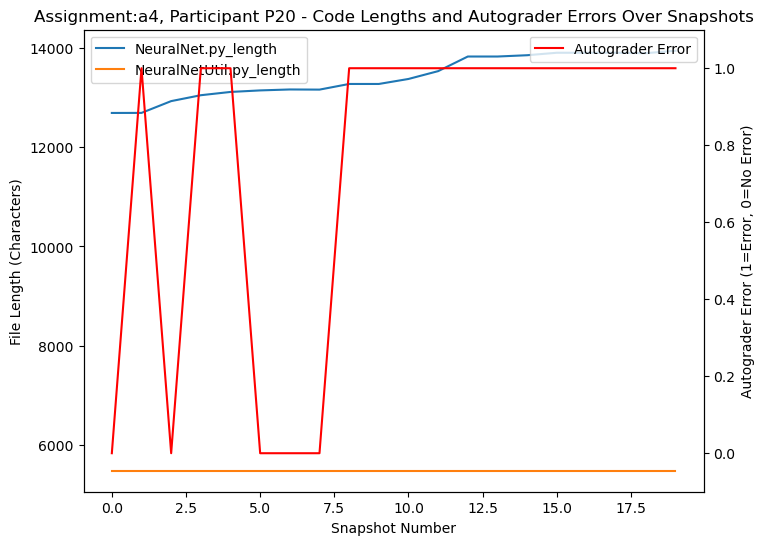

NeuralNet.py_length NeuralNetUtil.py_length


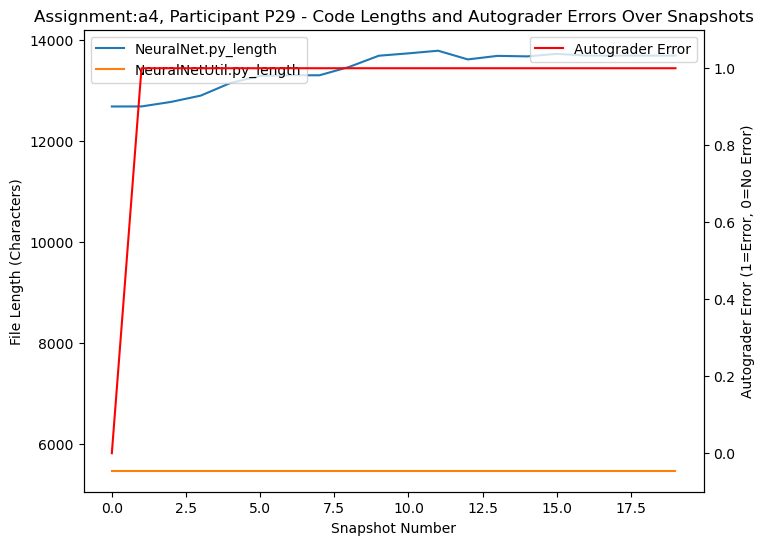

NeuralNet.py_length NeuralNetUtil.py_length


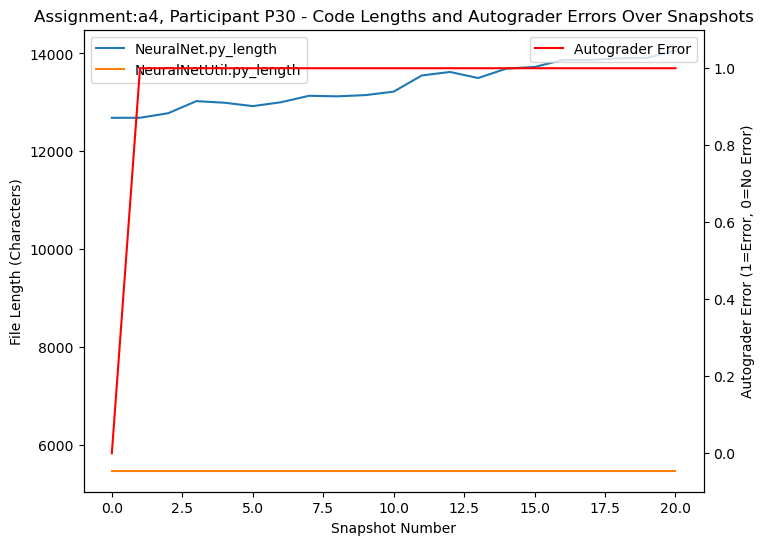

NeuralNet.py_length NeuralNetUtil.py_length


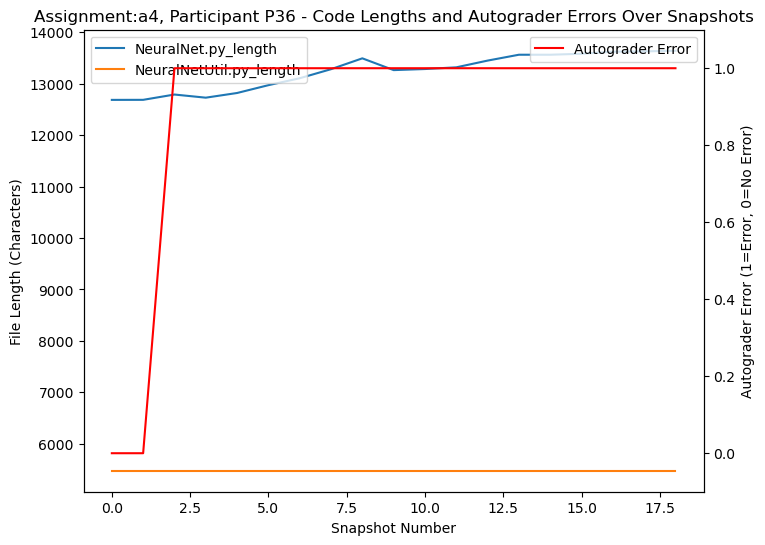

NeuralNet.py_length NeuralNetUtil.py_length


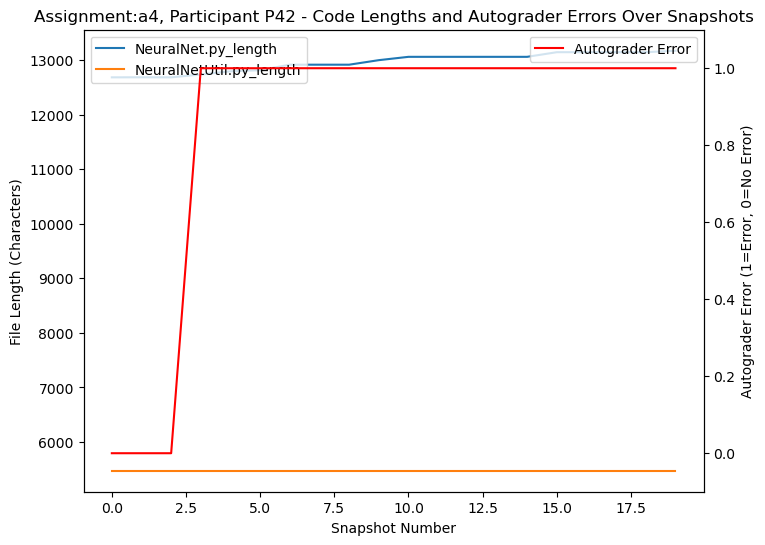

NeuralNet.py_length NeuralNetUtil.py_length


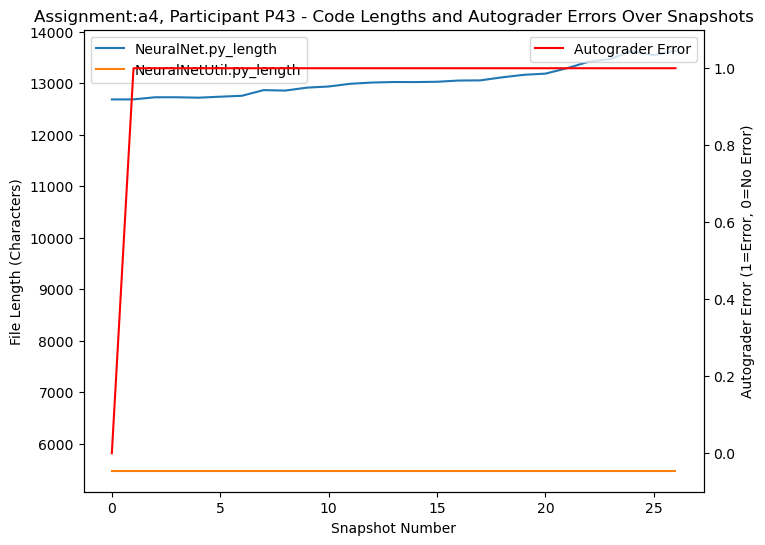

NeuralNet.py_length NeuralNetUtil.py_length


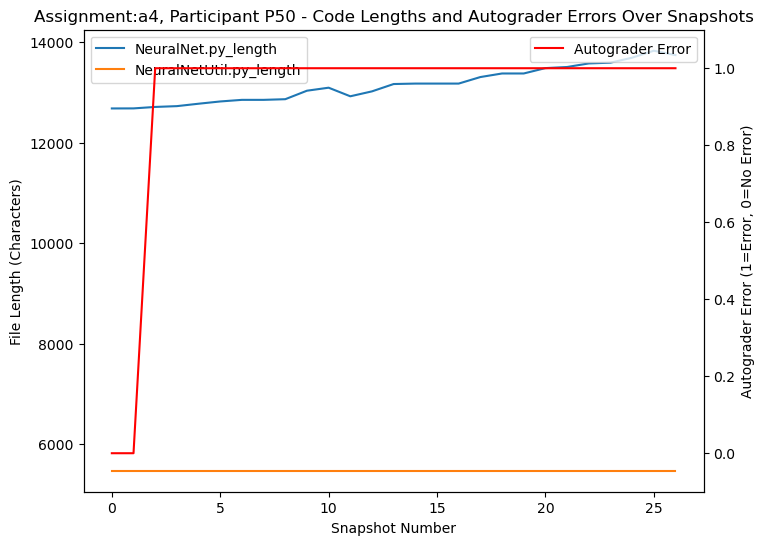

NeuralNet.py_length NeuralNetUtil.py_length


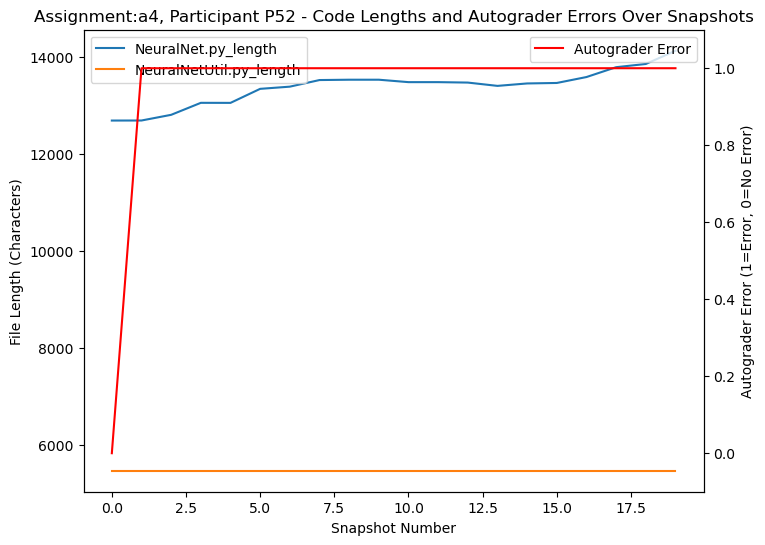

NeuralNet.py_length NeuralNetUtil.py_length


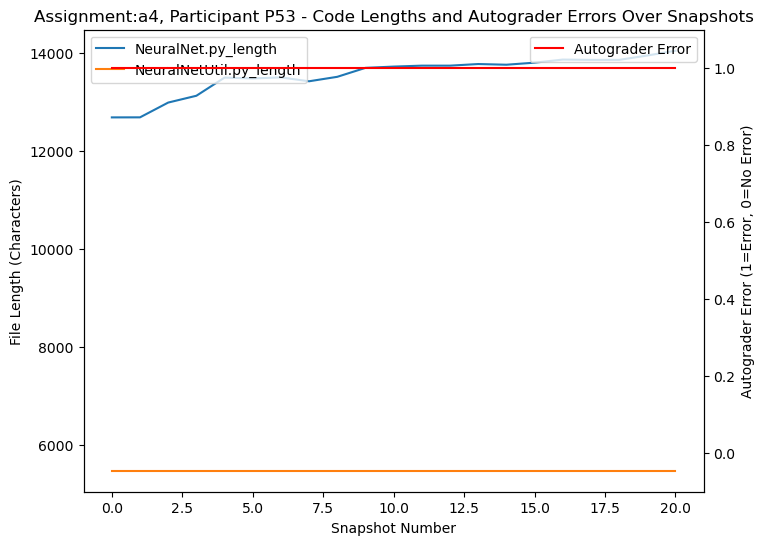

NeuralNet.py_length NeuralNetUtil.py_length


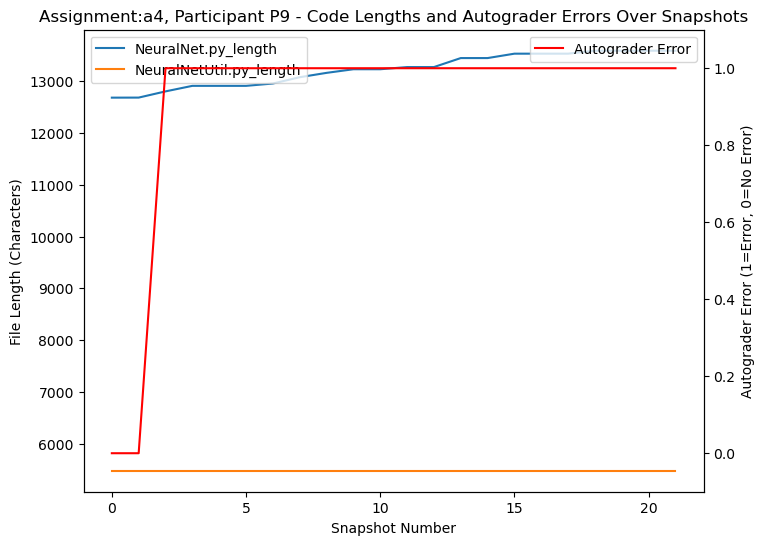

In [35]:
plot_keylogger_results(df_a4,a3=False)

# TODO: Run remote autograder

In [36]:
df_a3

,participant,snapshot,autograder_error,bustersAgents.py_length,inference.py_length
0,P11,0,1,21794,19913
1,P11,1,1,21794,19914
2,P11,2,1,21794,19913
3,P11,3,1,21794,19913
4,P11,4,1,21794,19913
...,...,...,...,...,...
310,P5,48,1,23330,26720
311,P5,49,1,23330,26885
312,P5,50,1,23330,27055
313,P5,51,1,23330,27080
